In [41]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd


In [42]:
df_penetracion_int= pd.read_csv('df_int_penetracion_prov.csv')
df_penetracion_int

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2014,4,Buenos Aires,17.01,56.09
1,2014,3,Buenos Aires,17.26,56.75
2,2014,2,Buenos Aires,16.79,55.06
3,2014,1,Buenos Aires,16.69,54.57
4,2014,4,Capital Federal,43.60,114.90
...,...,...,...,...,...
859,2022,1,Tierra Del Fuego,29.14,98.29
860,2022,4,Tucumán,15.12,61.04
861,2022,3,Tucumán,15.14,61.14
862,2022,2,Tucumán,14.69,59.31


In [154]:
df_penetracion_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hab      864 non-null    float64
 4   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


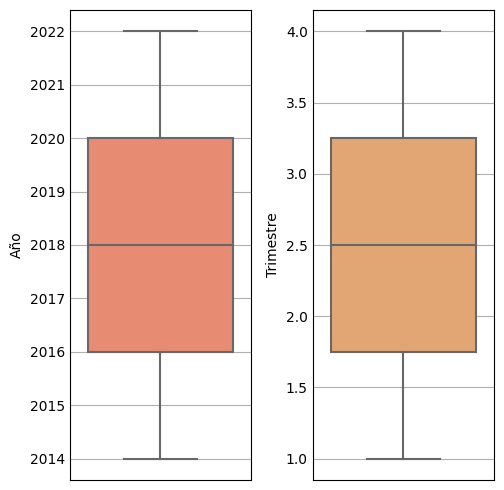

In [72]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear subplots para los gráficos 
plt.subplot(1, 4, 1) 
sns.boxplot(data=df_penetracion_int, y='Año', color = "#FA8060")
plt.ylabel('Año')

plt.subplot(1, 4, 2) 
sns.boxplot(data=df_penetracion_int, y='Trimestre', color = "#F4A462")
plt.ylabel('Trimestre')

plt.tight_layout()



plt.show()

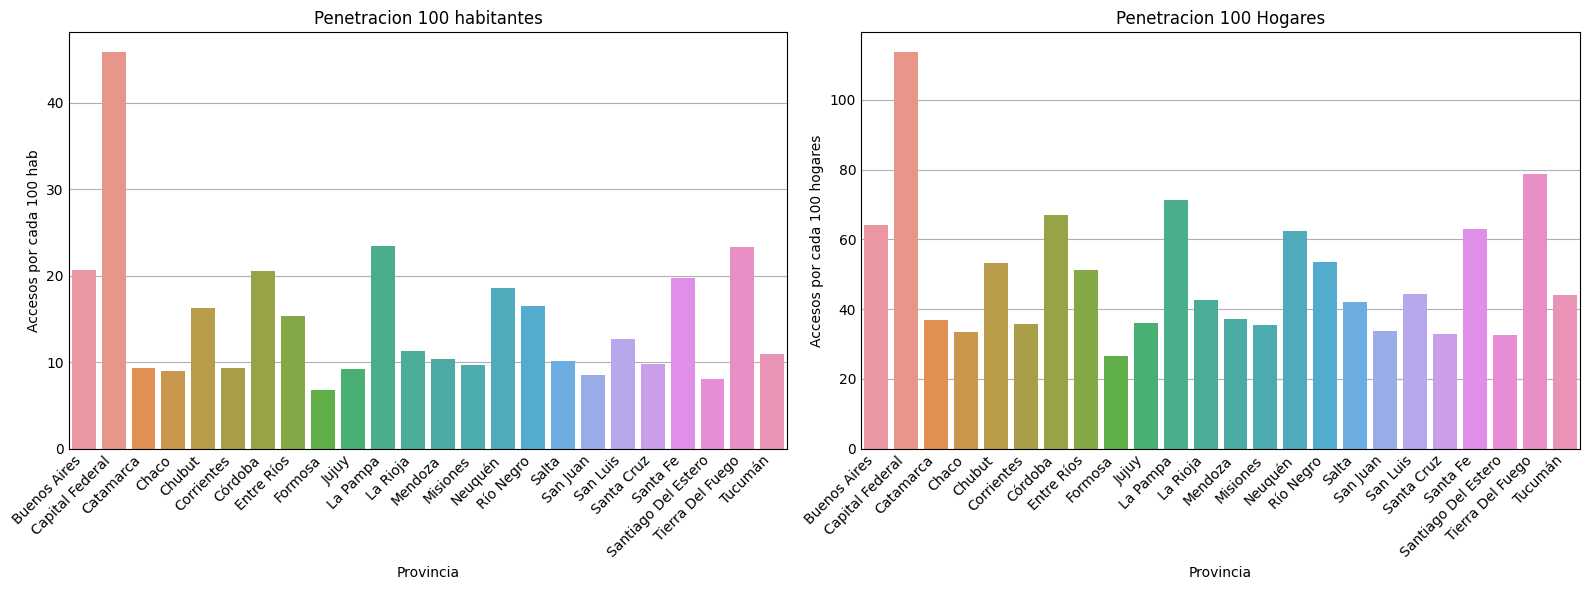

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Primer subgráfico
sns.barplot(data=df_penetracion_int, x="Provincia", y="Accesos por cada 100 hab", errorbar=None, ax=ax[0])
ax[0].set_title('Penetracion 100 habitantes')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df_penetracion_int, x="Provincia", y="Accesos por cada 100 hogares", errorbar=None, ax=ax[1])
ax[1].set_title('Penetracion 100 Hogares')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra la figura con subgráficos
plt.show()


In [73]:
df_int_acve_pro= pd.read_csv('df_int_acve_pro.csv')
df_int_acve_pro

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0,28.934,23.347,259866.0,281.550,244.555,98.670,3760109.0,97.634,4794665.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0,516.000,5.096,31320.0,64.653,36.336,8.116,1299117.0,106.772,1551926.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0,71.000,315.000,2716.0,5.028,4.638,3.122,52739.0,2.280,70909.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0,461.000,771.000,16067.0,17.846,6.704,3.039,94866.0,3.909,143663.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0,109.000,1.614,46457.0,31.007,34.728,15.770,19048.0,20.026,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0,161.000,1.625,24972.0,1.000,1.000,0.000,0.0,0.000,26760.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0,8.456,124.468,345225.0,20.328,6.845,23.000,668.0,0.000,506013.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0,1.234,10.531,22817.0,2.422,109.000,0.000,0.0,0.000,37113.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0,12.000,607.000,30902.0,6.000,0.000,0.000,0.0,0.000,31527.0


In [74]:
df_int_acve_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   ADSL                 864 non-null    float64
 4   Cablemodem           864 non-null    float64
 5   Fibra óptica         864 non-null    float64
 6   Wireless             864 non-null    float64
 7   Otros                864 non-null    float64
 8   Total_x              864 non-null    float64
 9   HASTA 512 kbps       864 non-null    float64
 10  + 512 Kbps - 1 Mbps  864 non-null    float64
 11  + 1 Mbps - 6 Mbps    864 non-null    float64
 12  + 6 Mbps - 10 Mbps   864 non-null    float64
 13  + 10 Mbps - 20 Mbps  864 non-null    float64
 14  + 20 Mbps - 30 Mbps  864 non-null    float64
 15  + 30 Mbps            864 non-null    flo

In [141]:
Totaltc =df_int_acve_pro.groupby(['Año'])[['ADSL','Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index()


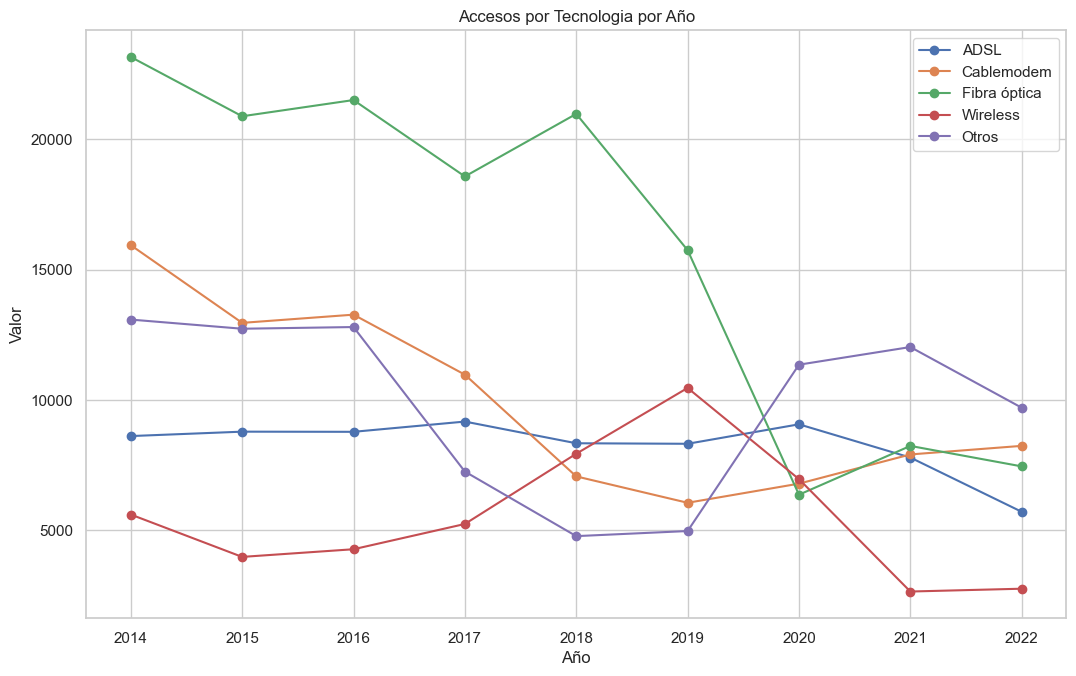

In [142]:

df = Totaltc

# Configurar el gráfico de líneas múltiples
plt.figure(figsize=(10, 6))

# Iterar a través de las columnas del DataFrame y trazar cada línea
for columna in df.columns[1:]:
    plt.plot(df['Año'], df[columna], label=columna, marker='o')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Accesos por Tecnologia por Año')
plt.legend()

# Mostrar el gráfico
plt.show()



In [128]:

TotalVE=df_int_acve_pro.groupby(['Año'])[['HASTA 512 kbps','+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                                        '+ 10 Mbps - 20 Mbps','+ 20 Mbps - 30 Mbps','+ 30 Mbps', 'OTROS']].sum().reset_index()

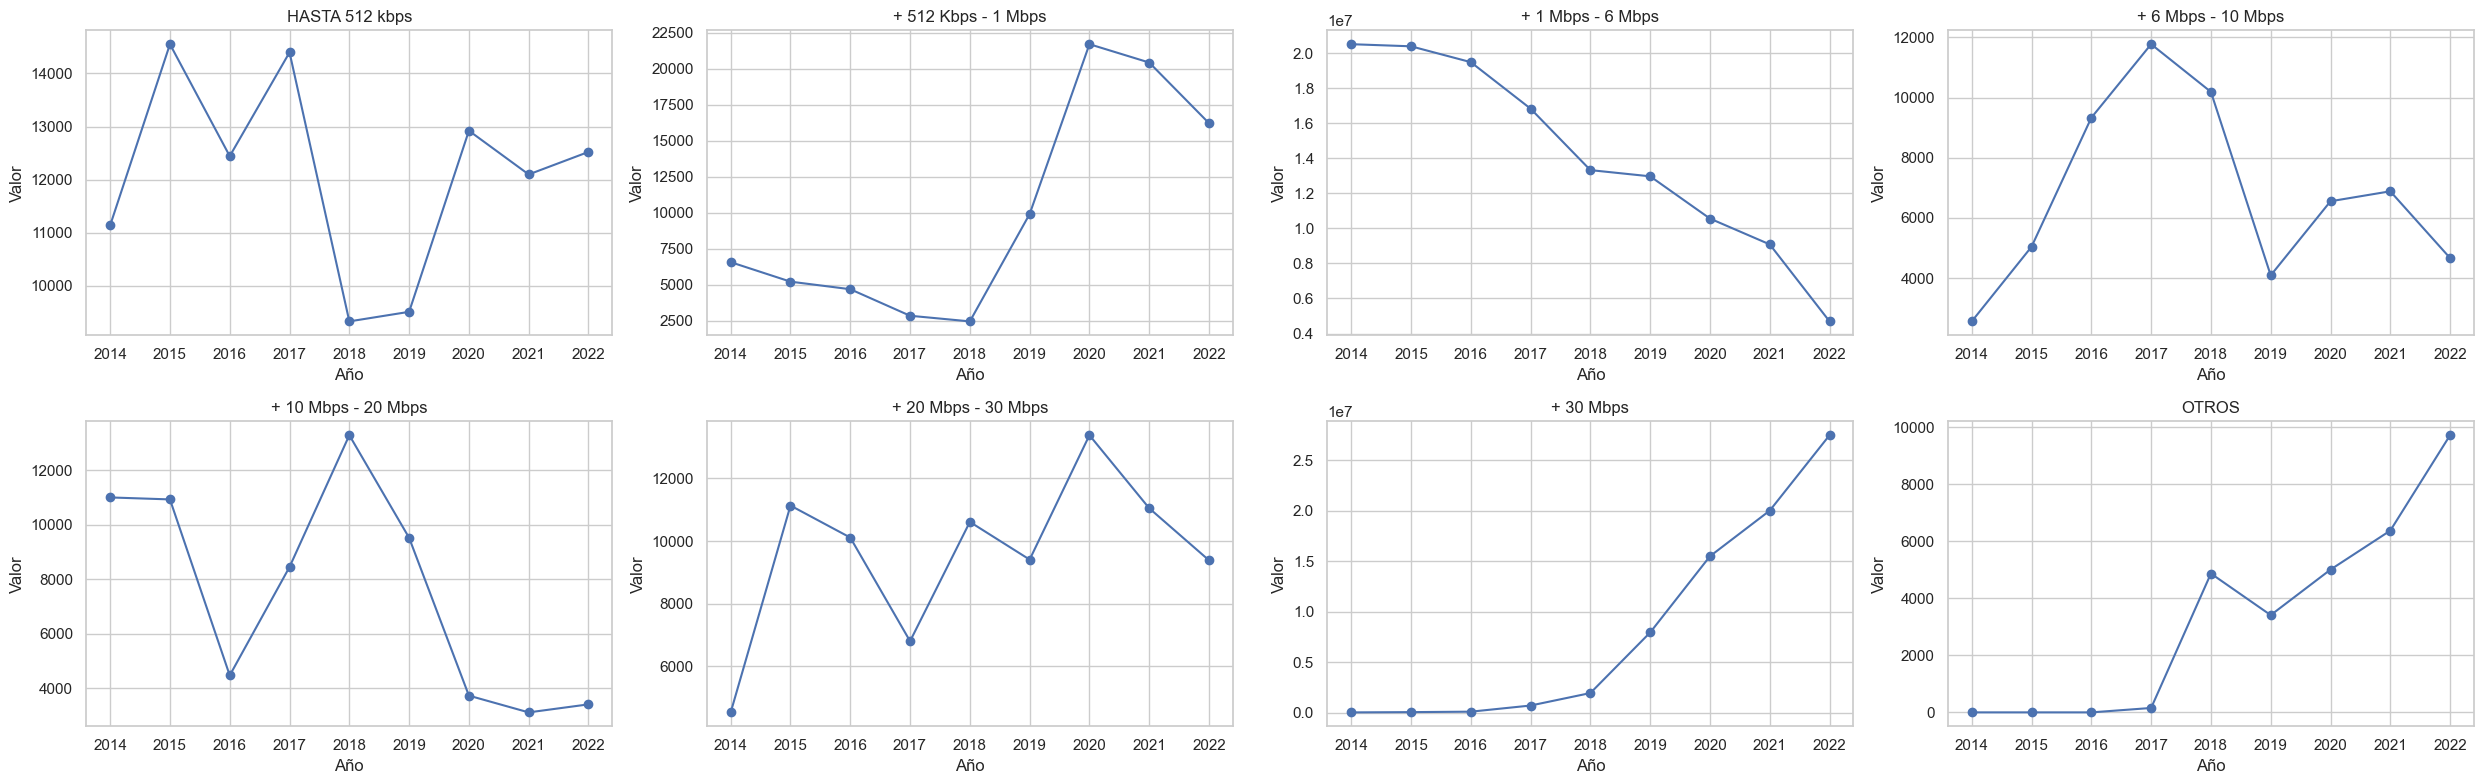

In [153]:
# Configurar subgráficos
num_columnas = 4
num_filas = (len(df.columns[1:]) + num_columnas - 1) // num_columnas  # Calcular el número de filas necesario
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(25, 8))

# Iterar a través de las columnas del DataFrame y trazar cada línea en un subplot
for i, columna in enumerate(df.columns[1:]):
    row = i // num_columnas
    col = i % num_columnas
    
    axes[row, col].plot(df['Año'], df[columna], marker='o')
    axes[row, col].set_title(columna)
    axes[row, col].set_xlabel('Año')
    axes[row, col].set_ylabel('Valor')

# Ajustar el diseño de los subgráficos
plt.tight_layout() 

# Mostrar el gráfico
plt.show()


In [144]:
df_int_tv_mv= pd.read_csv('df_anual_int_tv_mv.csv')
df_int_tv_mv.head()

,Año,Trimestre,Accesos internet 100 hogares,Accesos internet 100 hab,Accesos TV por suscripción por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,Accesos TV satelital por cada 100 hogares,Accesos movil 100 hab
0,2022,4,77.21,24.15,16.55,3.96,52.90,12.66,12.865
1,2022,3,76.64,23.95,16.56,4.46,52.97,14.27,12.798
2,2022,2,75.97,23.72,16.55,4.47,53.01,14.31,12.795
3,2022,1,73.88,23.05,16.41,4.45,52.61,14.25,12.837
4,2021,4,73.18,22.81,16.52,4.37,52.99,14.02,12.844


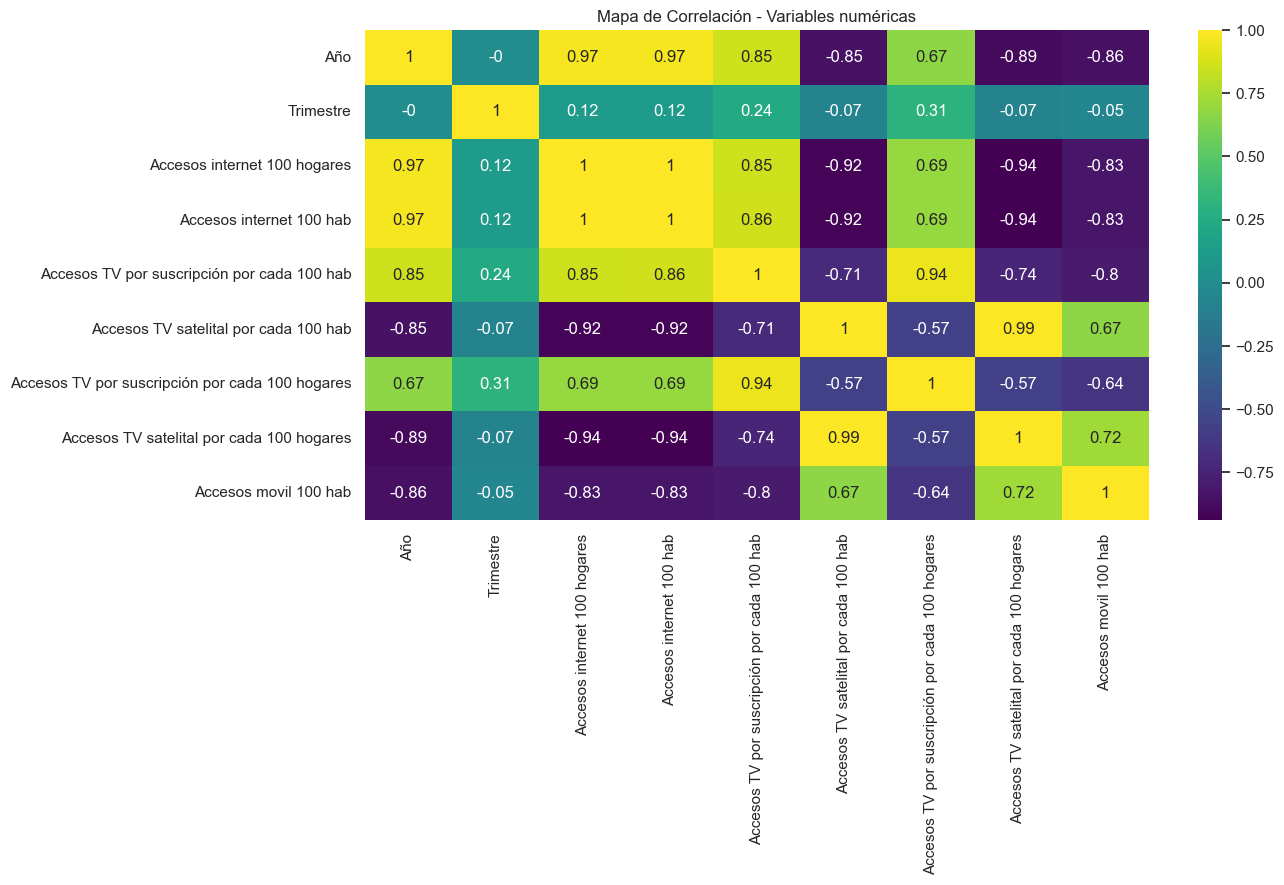

In [150]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df_int_tv_mv.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()